In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [62]:
os.chdir(r"C:\Users\bishw\Downloads\Compressed\dataset")

In [63]:
os.listdir()

['augmented_img', 'single_prediction', 'test_set', 'training_set']

In [65]:
train = os.getcwd()+'\\'+os.listdir()[3]
test = os.getcwd()+'\\'+os.listdir()[2]

In [66]:
os.listdir(train)

['cats', 'dogs']

In [67]:
os.listdir(train+'\\'+os.listdir(train)[0])

['cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.1001.jpg',
 'cat.1002.jpg',
 'cat.1003.jpg',
 'cat.1004.jpg',
 'cat.1005.jpg',
 'cat.1006.jpg',
 'cat.1007.jpg',
 'cat.1008.jpg',
 'cat.1009.jpg',
 'cat.101.jpg',
 'cat.1010.jpg',
 'cat.1011.jpg',
 'cat.1012.jpg',
 'cat.1013.jpg',
 'cat.1014.jpg',
 'cat.1015.jpg',
 'cat.1016.jpg',
 'cat.1017.jpg',
 'cat.1018.jpg',
 'cat.1019.jpg',
 'cat.102.jpg',
 'cat.1020.jpg',
 'cat.1021.jpg',
 'cat.1022.jpg',
 'cat.1023.jpg',
 'cat.1024.jpg',
 'cat.1025.jpg',
 'cat.1026.jpg',
 'cat.1027.jpg',
 'cat.1028.jpg',
 'cat.1029.jpg',
 'cat.103.jpg',
 'cat.1030.jpg',
 'cat.1031.jpg',
 'cat.1032.jpg',
 'cat.1033.jpg',
 'cat.1034.jpg',
 'cat.1035.jpg',
 'cat.1036.jpg',
 'cat.1037.jpg',
 'cat.1038.jpg',
 'cat.1039.jpg',
 'cat.104.jpg',
 'cat.1040.jpg',
 'cat.1041.jpg',
 'cat.1042.jpg',
 'cat.1043.jpg',
 'cat.1044.jpg',
 'cat.1045.jpg',
 'cat.1046.jpg',
 'cat.1047.jpg',
 'cat.1048.jpg',
 'cat.1049.jpg',
 'cat.105.jpg',
 'cat.1050.jpg',
 'cat.10

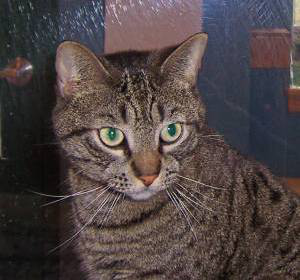

In [68]:
load_img(r"C:\Users\bishw\Downloads\Compressed\dataset\training_set\cats\cat.1.jpg")

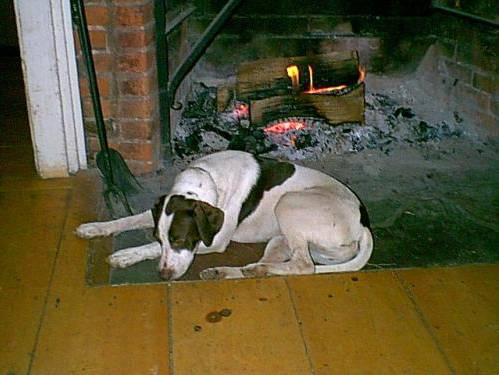

In [69]:
load_img(train+'\\'+os.listdir(train)[1]+'\\dog.25.jpg')

In [9]:
dim1 = []
dim2 = []
for i in os.listdir(train+'\\'+os.listdir(train)[1]):
    dim1.append(img_to_array(load_img(train+'\\'+os.listdir(train)[1]+'\\'+i)).shape[0])
    dim2.append(img_to_array(load_img(train+'\\'+os.listdir(train)[1]+'\\'+i)).shape[0])       

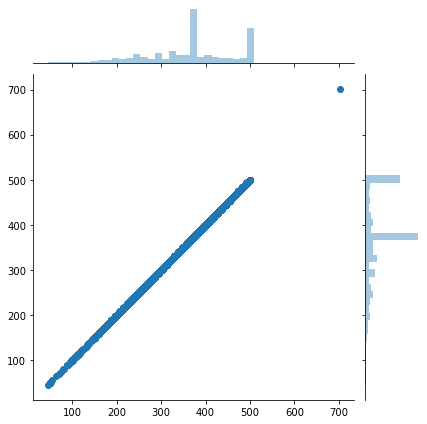

In [10]:
sns.jointplot(dim1, dim2)

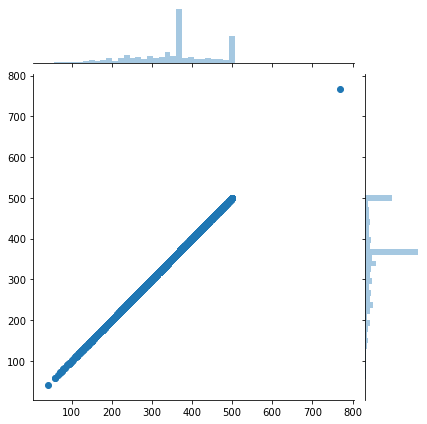

In [11]:
dim1 = []
dim2 = []
for i in os.listdir(train+'\\'+os.listdir(train)[0]):
    dim1.append(img_to_array(load_img(train+'\\'+os.listdir(train)[0]+'\\'+i)).shape[0])
    dim2.append(img_to_array(load_img(train+'\\'+os.listdir(train)[0]+'\\'+i)).shape[0])       

sns.jointplot(dim1, dim2)

In [12]:
np.mean(dim1), np.mean(dim2)

(356.09925, 356.09925)

In [70]:
std_img_dim = (64,64,3)

In [71]:
img_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 20, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')

In [72]:
img_gen.flow_from_directory(train)

Found 8000 images belonging to 2 classes.


In [51]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=std_img_dim, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=std_img_dim, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [73]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=std_img_dim, activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=std_img_dim, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding = 'same'))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
early_stop = EarlyStopping(monitor='val_accuracy',patience = 5)


In [75]:
batch_size = 25


In [82]:
train_image_gen = img_gen.flow_from_directory(train,
                                               target_size=std_img_dim[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 8000 images belonging to 2 classes.


In [83]:
test_image_gen = img_gen.flow_from_directory(test,
                                               target_size=std_img_dim[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle = False)

Found 2000 images belonging to 2 classes.


In [84]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [85]:
results = model.fit(train_image_gen,epochs= 20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
320/320 [==============================] - 96s 301ms/step - loss: 0.6467 - accuracy: 0.6315 - val_loss: 0.6180 - val_accuracy: 0.6700
Epoch 2/20
320/320 [==============================] - 96s 300ms/step - loss: 0.6246 - accuracy: 0.6572 - val_loss: 0.5935 - val_accuracy: 0.6800
Epoch 3/20
320/320 [==============================] - 95s 296ms/step - loss: 0.6042 - accuracy: 0.6768 - val_loss: 0.5741 - val_accuracy: 0.6985
Epoch 4/20
320/320 [==============================] - 94s 294ms/step - loss: 0.5853 - accuracy: 0.6901 - val_loss: 0.5597 - val_accuracy: 0.7135
Epoch 5/20
320/320 [==============================] - 92s 287ms/step - loss: 0.5790 - accuracy: 0.6941 - val_loss: 0.5649 - val_accuracy: 0.7280
Epoch 6/20
320/320 [==============================] - 92s 289ms/step - loss: 0.5670 - accuracy: 0.7049 - val_loss: 0.5619 - val_accuracy: 0.7180
Epoch 7/20
320/320 [==============================] - 96s 300ms/step - loss: 0.5589 - accuracy: 0.7114 - val_loss: 0.5574 - val_ac

In [86]:
res = pd.DataFrame(model.history.history)

<AxesSubplot:>

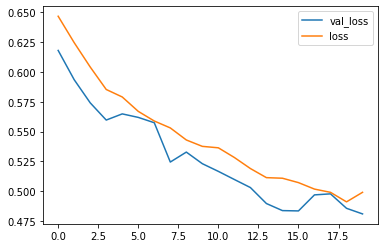

In [87]:
res[['val_loss','loss']].plot()

<AxesSubplot:>

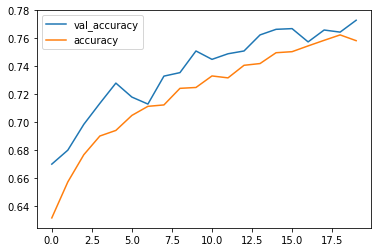

In [88]:
res[['val_accuracy','accuracy']].plot()

In [89]:
test_1 = image.img_to_array(image.load_img(r"C:\Users\bishw\Downloads\Compressed\dataset\single_prediction\cat_or_dog_1.jpg", target_size = std_img_dim))

In [90]:
test_1 = np.expand_dims(test_1, axis = 0)

In [91]:
model.predict_classes(test_1)

array([[1]])

In [92]:
test_2 = image.img_to_array(image.load_img(r"C:\Users\bishw\Downloads\Compressed\dataset\single_prediction\cat_or_dog_2.jpg", target_size = std_img_dim))

In [93]:
test_2 = np.expand_dims(test_2, axis = 0)

In [94]:
model.predict_classes(test_2)

array([[0]])

In [43]:
import cv2

1. Split Data into train and test
2. Perform Data Augmentation and save the results on train class folders
3. Save the train and test as .npz files
4. Once the X_train, y_train and X_test and y_test are found perfrom HyperOpt


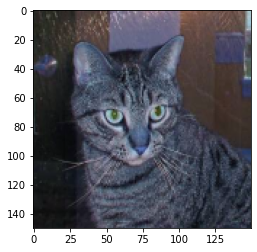

In [47]:
plt.imshow(cv2.resize(cv2.imread(r"C:\Users\bishw\Downloads\Compressed\dataset\training_set\cats\cat.1.jpg"), (150,150), interpolation = cv2.INTER_AREA))